In [ ]:
# K means clustering - partioning of data into distinct clusters.

# k - means clustering algorithm

# 1) choose the number of clusters k

# 2) Randomly intialize k centroids

# 3) Repeat until convergence

# 3.1 ) Assign each point to the nearest centroid

# 3.2) update the centroids based on assigned points

# choose k based on the elbow method

# Advantages - simple and easy to understand

# limitation -sensitive to the initial placement of centroids and struggles with non - spherical clusters



In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/circket (1).csv', encoding = 'latin')

In [ ]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
# # we are going to split each string at the "-" character into two seperate thing and put them in 2
# new columns "start year" and the "end year"

df[["start" , "end"]] = df["Span"].str.split("-", expand = True)

In [ ]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     object 
 14  end     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [ ]:
# change the datatype of two new columns from object to int

df['start'] = df['start'].astype(int)
df['end'] = df['end'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  start   79 non-null     int64  
 14  end     79 non-null     int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 9.4+ KB


In [ ]:
# calculate the experience of each player

df['Exp'] = df['end'] - df['start']

In [ ]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [ ]:
# deleting the span , start , end columns because now we have the experience column

  df.drop(['Span' , 'start' , 'end'] , axis = 1 , inplace = True)

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# In HS column we are having "*" for not out , so we will replace it with empty string ""

df['HS'] = df['HS'].str.replace("*" , " ")

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
df['HS'] = df['HS'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


In [ ]:
# step - 3 EDA

df.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# check for outliers

for i in df.columns:
    print(i)

Player
Mat
Inns
NO
Runs
HS
Ave
BF
SR
100
50
0
Exp


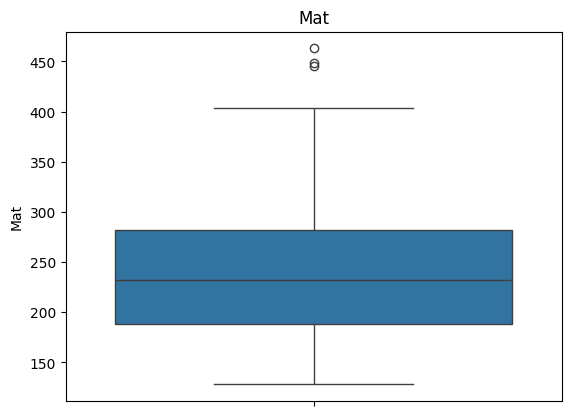

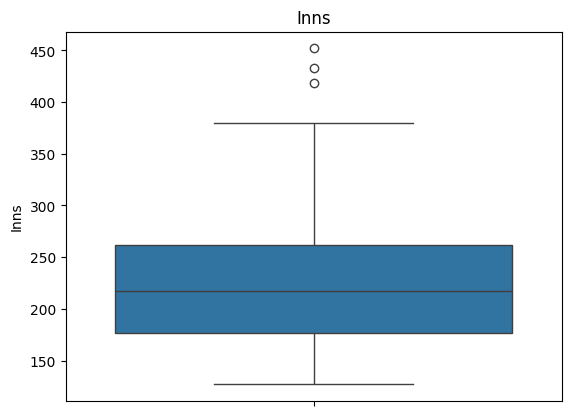

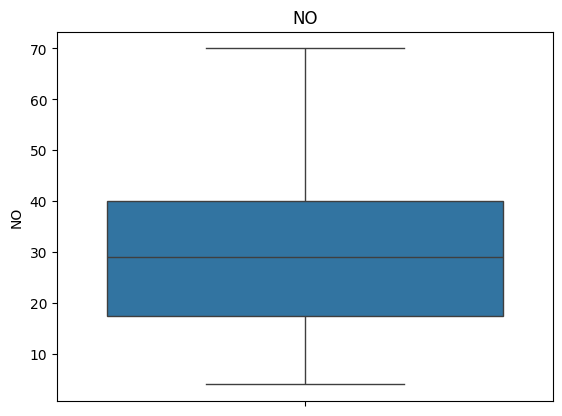

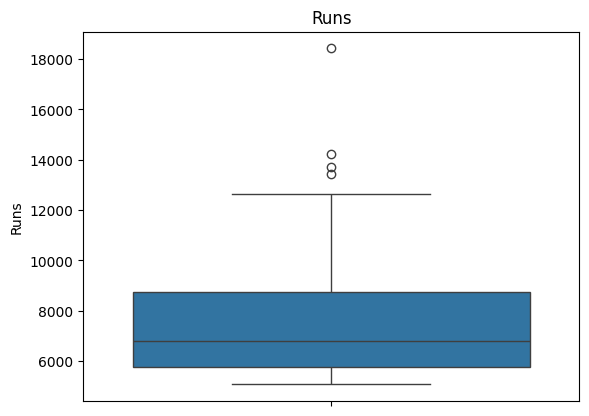

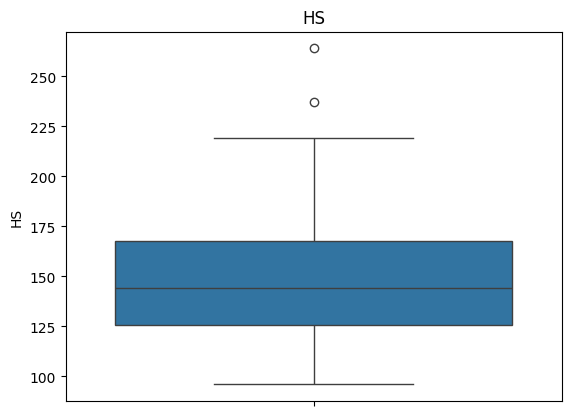

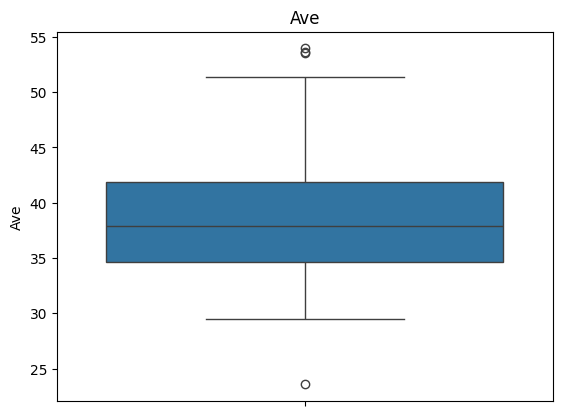

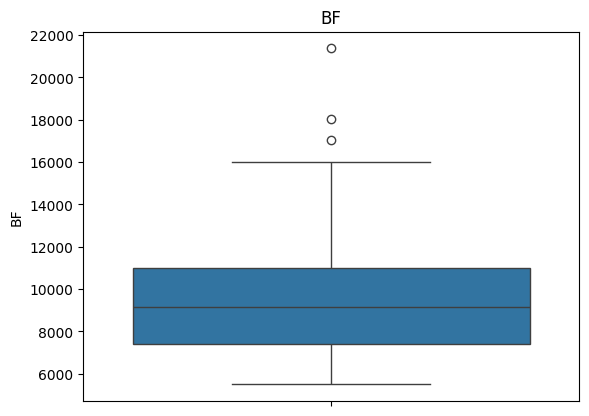

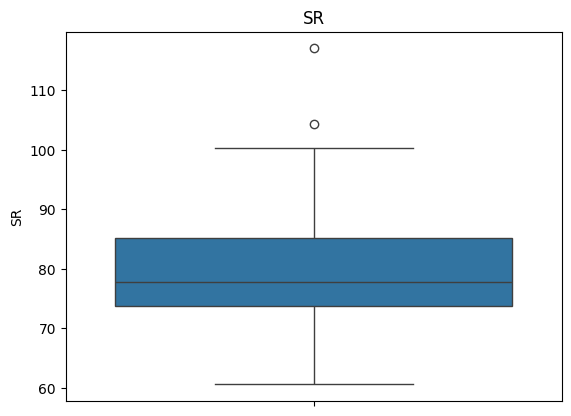

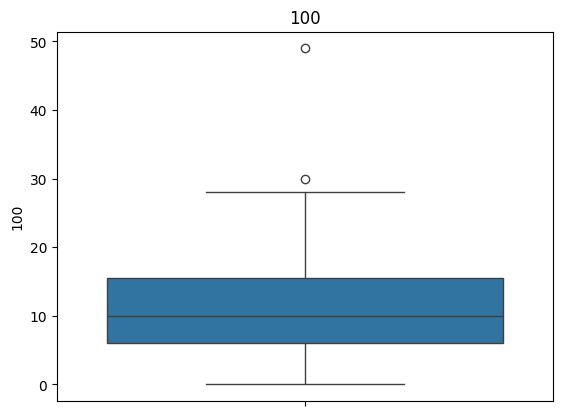

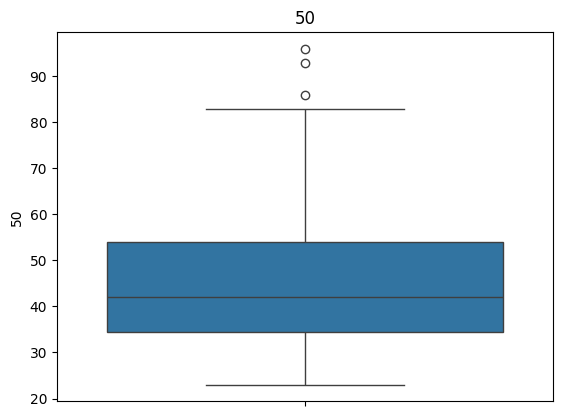

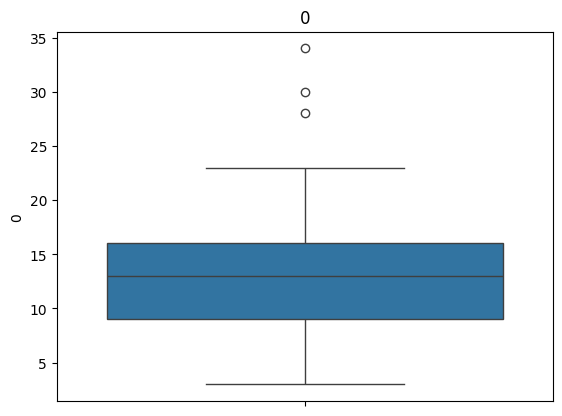

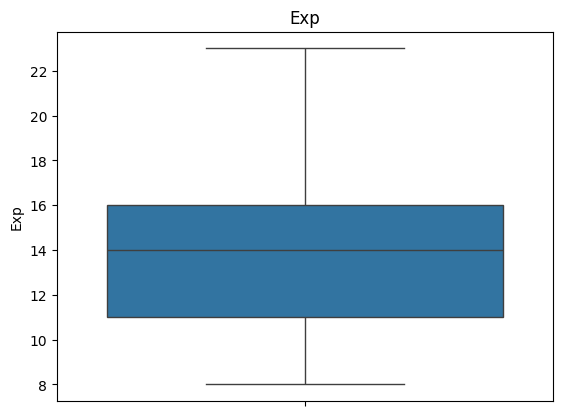

In [ ]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [ ]:
# lets create a copy of the original dataframe so we can try operations on it

df_copy = df.copy()

In [ ]:
df_copy

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# let's just drop the player name column
df_copy.drop(['Player'] , axis = 1 , inplace = True)

In [ ]:
df_copy

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler


In [ ]:
sc = StandardScaler()

In [ ]:
df_scaled = sc.fit_transform(df_copy)

In [ ]:
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df_scaled = pd.DataFrame(df_scaled , columns = df_copy.columns)
df_scaled

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


K Means Model Building

In [ ]:
from sklearn. cluster import KMeans

In [ ]:
k_values = [2,3,4,5,6,7]

use elbow method

In [ ]:
ssd = []
for k in k_values:
  kmodel = KMeans(n_clusters = k , max_iter = 150 , random_state =42)
  kmodel.fit(df_scaled)
  ssd.append(kmodel.inertia_)

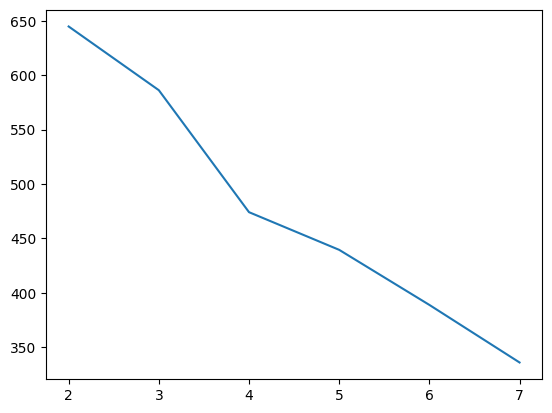

In [ ]:
plt.plot(k_values , ssd)

In [ ]:
kmodel = KMeans(n_clusters = 4 , max_iter = 150 , random_state =42)
kmodel.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=42)

In [ ]:
kmodel.labels_ # This will assign each and every player with a clsuter id

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 1, 0, 1, 1, 3, 0, 3,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], dtype=int32)

In [ ]:
df['ClusterID'] = kmodel.labels_ # we are creating a column in the dataframe for the cluster id of each and every player

In [ ]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,1
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,1
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,1


In [ ]:
group1  = df[df['ClusterID'] == 0]

In [ ]:
group1

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,0
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,0
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,0
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0
64,MEK Hussey (AUS),185,157,44,5442,109,48.15,6243,87.16,3,39,3,8,0


In [ ]:
group2  = df[df['ClusterID'] == 2]
group2

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,2
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,2
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,2
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,2


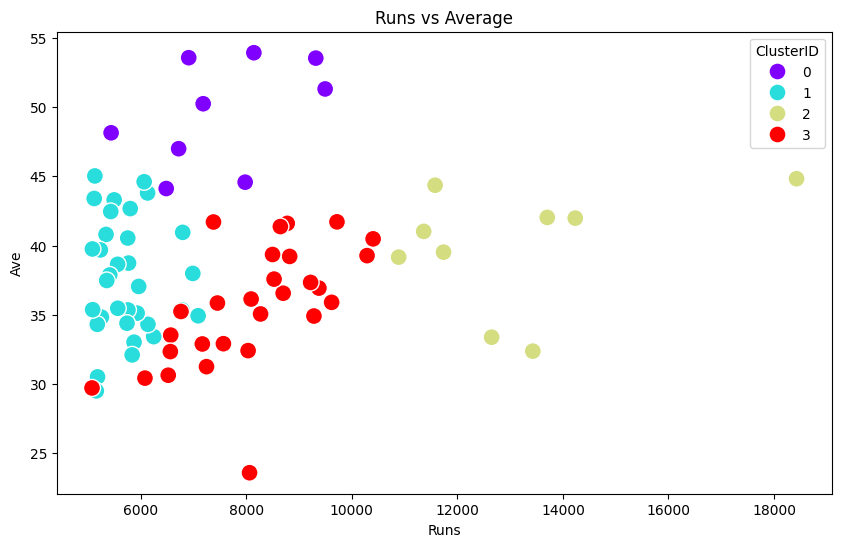

In [ ]:
plt.figure(figsize =(10,6))
sns.scatterplot(data = df , x = "Runs" , y = "Ave" , hue = "ClusterID", palette = 'rainbow', s = 150)
plt.title("Runs vs Average")
plt.show()